# Minesweeper Project

- **Programmer:** James Harling
- **Date:** April 13th, 2023
- **Language:** Python 3.9.13


### Description
This is the first project for the *NOD Coding Data Analytics Bootcamp* in Stockholm Sweden, where I built a program that, without the use of object oriented programming, replicates the classic Minesweeper game using text-based graphics. It allows the player to uncover cells on a grid while avoiding hidden mines. The game provides feedback on nearby mines and tracks the player's progress.

### Lessons Learned
- An object-oriented approach would have been more suitable for the different layers of the maps generated. If I'd done that, the code would've been much cleaner.

### Libraries
The imported libraries for the code.

In [1]:
# To place the mines in random locations.
import random

# To clear out the output of any cell.
from IPython.display import clear_output

# I'm not working with objects, and need to deepcopy the differnt minefield maps
# which are stored as lists.
import copy

### Global Variables
The game settings which can be customized.

In [18]:
# Minefield Settings
minefield_rows = 3 # How tall, vertically, the minefield is.
minefield_columns = 4 # How wide it is.
number_of_mines = 5 # How many mines are in the minefield.

# Dictionary used to display the different tile images.
tile_image = {
    0: "0️⃣",
    1: "1️⃣",
    2: "2️⃣",
    3: "3️⃣",
    4: "4️⃣",
    5: "5️⃣",
    6: "6️⃣",
    7: "7️⃣",
    8: "8️⃣",
    "cleared": "⬜",
    "mine": "💥",
    "unexplored": "⬛",
}

# A list of all tiles that have been previously selected by the player.
tiles_selected = []

# A list of all of the safe locations on the map.
cleared_locations = []

## Functions: Generating the Minefields
Several minefields need to be generated for the game

### `generate_empty_minefield(minefield_rows, minefield_columns)`
First, we need to construct an empty minefield.
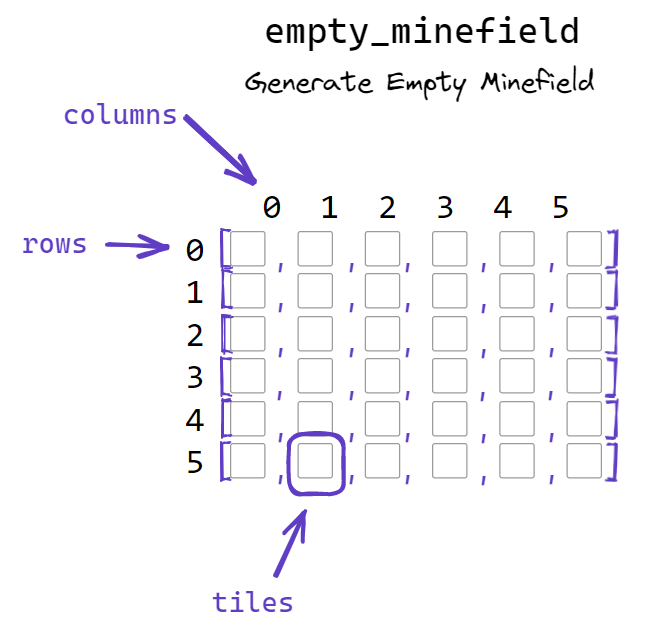

In [3]:
def generate_empty_minefield(minefield_rows, minefield_columns):
    
    # This generates an empty minefield based on
    # the specified rows and columns in the settings.
    return [[tile_image["cleared"] for column in range(1, minefield_columns + 1)] for row in range(1, minefield_rows + 1)]

### `place_mines (minefield, number_of_mines)`
Then we need to created a `mined_minefield` and get the `mine_locations`
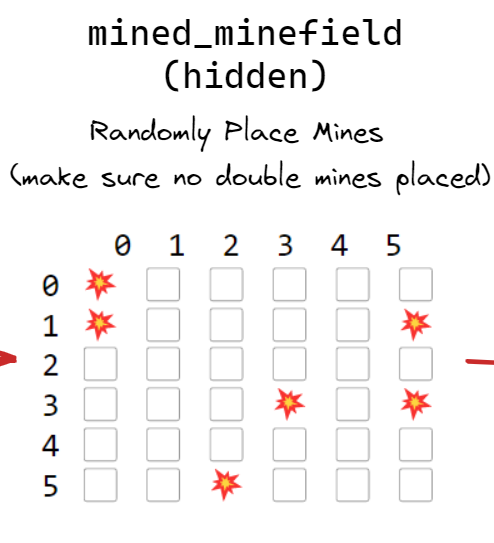

In [4]:
def place_mines(minefield, number_of_mines):
    
    mined_minefield = minefield
    mine_locations = []

    # Go through every individual mine.
    for mine in range(number_of_mines):
        
        mine_placed = False
        while mine_placed == False:
        
            # Select a random row and column.
            mine_row = random.randint(0, len(minefield) - 1)
            mine_column =  random.randint(0, len(minefield[0]) - 1)
            mine_location = (mine_row, mine_column)
            
            # If that location doesn't have a bomb...
            if minefield[mine_row][mine_column] != tile_image["mine"]:
                
                # ...place the bomb.
                minefield[mine_row][mine_column] = tile_image["mine"]
                
                # ...and mark the location in mine_locations.
                mine_locations.append(mine_location)
                
                # The mine has been placed.
                mine_placed = True
                
    return mined_minefield, mine_locations

### `get_surrounding_squares (grid_reference)`
We need a utility function that gets the grid references of the surrounding squares.
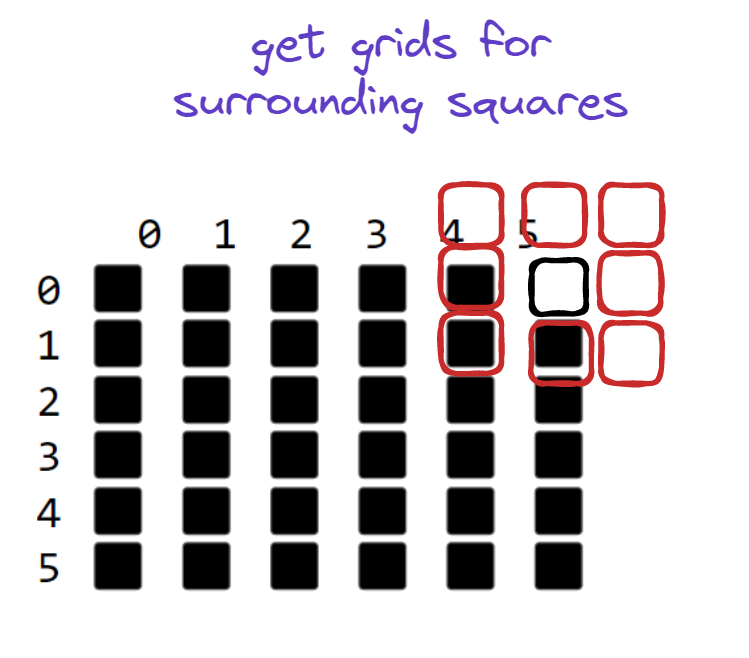

In [5]:
def get_surrounding_tiles(grid_reference):
    
    row, column = grid_reference
    
    surrounding_tiles = [
        (row - 1, column - 1), # 1: upper-left tile
        (row - 1, column),     # 2: upper
        (row - 1, column + 1), # 3: upper-right
        (row, column - 1),     # 4: left
        (row, column + 1),     # 5: right
        (row + 1, column - 1), # 6: lower-left
        (row + 1, column),     # 7: lower
        (row + 1, column + 1), # 8: lower-right
    ]

    
    return surrounding_tiles

### `place_numbered_tiles(minefield)`
We also need a map that contains the number of mines in each surrounding square. For example, the number 3 would mean that there are three mines in the surrounding 8 squares of that tile.
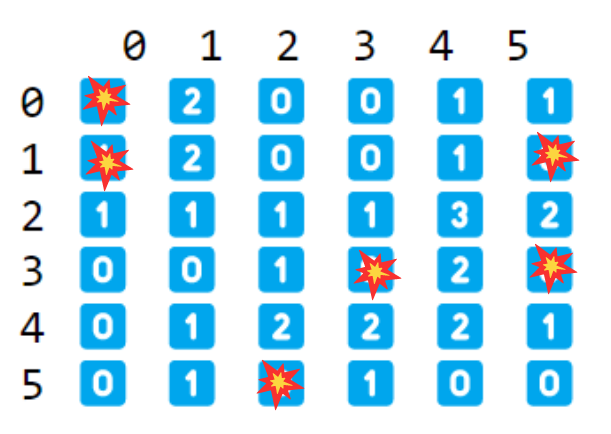

In [6]:
def place_numbers(minefield, mine_locations):
    
    # Generate a tuple list of all possible grid references in the minefield.
    grid_references = [(row_index, tile_index) 
                       for row_index, row in enumerate(minefield)
                       for tile_index, tile in enumerate(row)]
    
    # Go through each grid reference and find the grids of each surrounding tile.
    for current_tile in grid_references:

        # Find the grids of surrounding tiles.           
        surrounding_tiles = get_surrounding_tiles(current_tile)

        # Count how many mines there are in the surrounding tiles.
        mine_count = sum([surrounding_tiles.count(mine) for mine in mine_locations])

        # Unpack the row and grid of the current_tile tuple...
        current_tile_row, current_tile_column = current_tile

        # ...and set tile to number of mines.
        minefield[current_tile_row][current_tile_column] = tile_image[mine_count]

          
    return minefield

### `player_minefield`
We need to generate the matrix for what the player would see. The other maps are hidden.
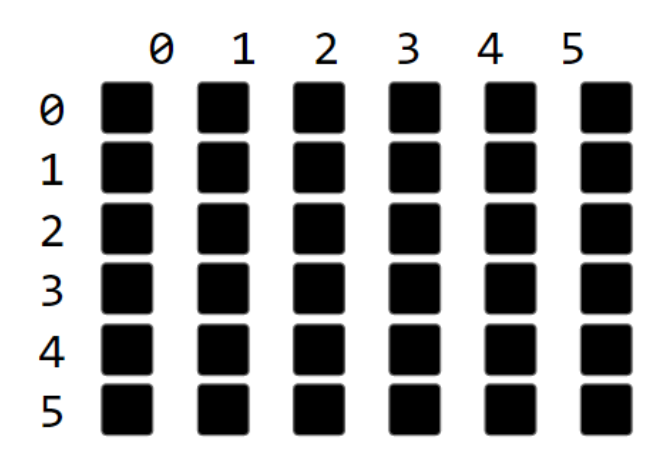

In [7]:
# The matrix for the minefield that is displayed to the player.
def generate_player_minefield(minefield_rows, minefield_columns):
    
    # This generates an empty minefield.
    return [[tile_image["unexplored"] for column in range(1, minefield_columns + 1)] for row in range(1, minefield_rows + 1)]

### `generate_minefields(minefield_rows, minefield_columns, number_of_mines)`
This is a compound function that generates all of the map matrices and returns the following variables: `mined_minefield`, `numbered_minefield`, `player_minefield`and `mine_locations`.

In [8]:
def generate_minefields(minefield_rows, minefield_columns, number_of_mines):
    
    # Generate an empty minefield.
    empty_minefield = generate_empty_minefield(minefield_rows, minefield_columns)
    
    # Generate the mined minefield..
    mined_minefield = copy.deepcopy(empty_minefield)
    mined_minefield, mine_locations = place_mines(mined_minefield, number_of_mines)
    
    # Generate the minefield with the number of mines
    # in each surrounding square.
    numbered_minefield = copy.deepcopy(mined_minefield)
    place_numbers(numbered_minefield, mine_locations)
    
    # Generate player display.
    player_minefield = generate_player_minefield(minefield_rows, minefield_columns)
    
    return mined_minefield, numbered_minefield, player_minefield, mine_locations

## FUNCTIONS: Displaying the Minefield

### `display_minefield(minefield)`
Allows you to display whatever form of the board you would like.
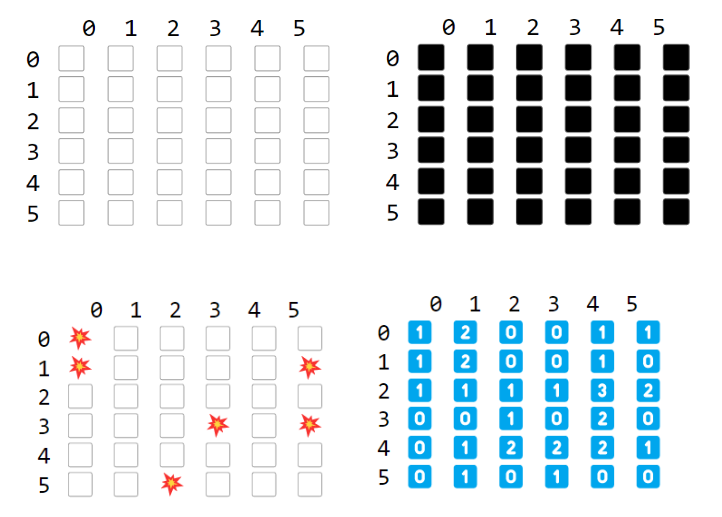

In [9]:
def display_minefield(minefield):
    
    # print header
    header = "  "
    
    for column in range(0, len(minefield[0])):
        header += "  " + str(column)
        
    print(header)
    
    # print minefield_rows
    for index, row in enumerate(minefield):
        print(str(index) + " " + " ".join(row))

# FUNCTIONS: Selecting Cells

### `choose_cell()`
Allows user to choose a cell, returning a `(row, column)` tuple.
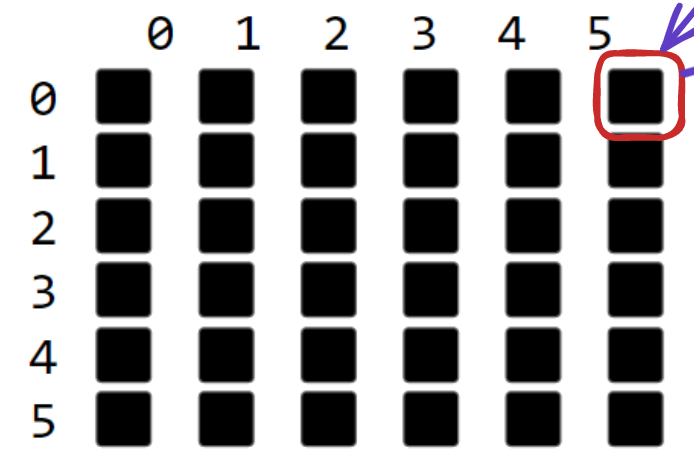

In [10]:
def choose_cell():

    # Loop until valid input is provided
    while True:
        try:
            selected_row = int(input(f"\nChoose Row (0-{minefield_rows - 1}): "))
            
            # Check if the input is within the valid range
            if 0 <= selected_row < minefield_rows:
                # Valid input, break out of the loop
                break
            else:
                print("Error: Please enter an integer within the correct range.")
        except ValueError:
            print("Error: Please enter an integer.")
    
    
    # Loop until valid input is provided
    while True:
        try:
            selected_column = int(input(f"Choose Column (0-{minefield_columns - 1}): "))
            # Check if the input is within the valid range
            if 0 <= selected_column < minefield_columns:
                # Valid input, break out of the loop
                break
            else:
                print("Error: Please enter an integer within the correct range.")
        except ValueError:
            print("Error: Please enter an integer.")
    
    return (selected_row, selected_column)

### `reveal_cells(tile_selected, mined_minefield, numbered_minefield, player_minefield, mine_locations, tiles_selected)`
This function reveals the selected tile and the surrounding 8 tiles.

In [11]:
def reveal_cells(tile_selected, mined_minefield, numbered_minefield, player_minefield, mine_locations, tiles_selected):
    
    # Append tile selected to the list.

    
    # Reveal the tile selected.
    # ⬛⬛⬛
    # ⬛🟥⬛
    # ⬛⬛⬛
    
    tile_row, tile_column = tile_selected
    
    player_minefield[tile_row][tile_column] = mined_minefield[tile_row][tile_column]
    
    # Get the tuple coordinates for surrounding tiles.
    # 🟥🟥🟥
    # 🟥⬛🟥
    # 🟥🟥🟥
    
    surrounding_tiles = get_surrounding_tiles(tile_selected)

            
    # Drop any of the surrounding cooordinate if they are outside of the minefield board
    # and was never selected before.
    # | —————
    # | ⬛🟥
    # | 🟥🟥

    valid_tiles = [(row, column) 
                   for row, column in surrounding_tiles 
                   if row >= 0 and column >= 0 
                   and row < minefield_rows and column < minefield_columns
                  and (row, column) not in tiles_selected]

    
    # Now we reveal the cells.
    for row, column in valid_tiles:
        player_minefield[row][column] = numbered_minefield[row][column]

### `clear_first_tile()`
This reveals the cells around one randomly selected tile, just to start the game, avoiding the possibility of landing on a mined square in the first turn, which would be unfair.

In [12]:
def clear_first_tile():
    while True:
    
        random_row = random.randint(0, minefield_rows - 1)
        random_column = random.randint(0, minefield_columns - 1)

        if (random_row, random_column) not in mine_locations:
            reveal_cells((random_row, random_column), mined_minefield, numbered_minefield, player_minefield, mine_locations, tiles_selected)
            tiles_selected.append((random_row, random_column))
            break

### `game_instructions(tiles_cleared_player, tiles_cleared_computer)`
Text message that tells the player the rules, and how many tiles they've cleared so far.

In [13]:
def game_instructions(tiles_cleared_player, tiles_cleared_computer):
    
    message = f"""
💥💥💣💣 MINESWEEPER lite 💣💣💥💥
    
This minefield has {number_of_mines} mines ({tile_image["mine"]})
    
Clear all the tiles to win the game.
The first tile has been cleared for you.
    
{tile_image["cleared"]}: Cleared
{tile_image["unexplored"]}: Unexplored
{tile_image[3]}: Number of mines in surrounding squares.
    
Tiles Cleared: {tiles_cleared_player}/{tiles_cleared_computer}
Total Mines: {number_of_mines}\n
"""
    
    print(message)

## FUNCTIONS: Winning / Losing Conditions

### `check_lose(tile_selected, mine_locations)`
After a player selects a cell, check to see if the player selected a mine.

In [14]:
def check_lose(tile_selected, mine_locations):
    if tile_selected in mine_locations:
        return True

### `check_win(computer_map, player_map)`
Checks to see if the player won by comparing how many safe tiles there are on the minefield and how many the player has cleared so far.

In [15]:
def check_win(mined_minefield, player_minefield):
    
    # count how many cleared tiles are on the computer board
    tiles_cleared_computer = [tile for row in mined_minefield
                           for tile in row].count(tile_image["cleared"])
    
    # count how many cleared tiles are on the computer board
    tiles_cleared_player = [tile for row in player_minefield
                           for tile in row].count(tile_image["cleared"])
    
    # Count how many cleared tiles are on the player board
    # if they are the same, all tiles have been cleared and the player wins.
    game_instructions(tiles_cleared_player, tiles_cleared_computer)

    if tiles_cleared_computer == tiles_cleared_player: 
        return True

### `game_over("win/lose")`
What happens, depending on whether the player won or lost.

In [16]:
def game_over(win_lose_state):
    
    # Check if win.
    if win_lose_state == "win":
        
        print("\n🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉\n🎉 MINEFIELD CLEARED!!! 🎉\n🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉")
        
    # Check if lose.
    elif win_lose_state == "lose":
        
        print("\n💥💥💥💥💥💥💥💥💥💥💥💥💥\n💥💥💥💥 GAME OVER!!! 💥💥💥\n💥💥💥💥💥💥💥💥💥💥💥💥💥")
        
    print("\nSOLUTION:\n")
    
    display_minefield(mined_minefield)

## Running the Program|
This is the main cell for running the game.

In [ ]:
# Minefields Generated
mined_minefield, numbered_minefield, player_minefield, mine_locations = generate_minefields(minefield_rows, minefield_columns, number_of_mines)

# Clear first tile, just to start the game.
clear_first_tile()

# Game Loop
while True:
    if check_win(mined_minefield, player_minefield):  # Check if player has won
        game_over("win")  # Call game_over function with "win" argument
        break

    display_minefield(player_minefield)  # Display the current state of the player's minefield

    tile_selected = choose_cell()  # Get player's selected cell
    tiles_selected.append(tile_selected)  # Append the selected cell to the list of selected cells

    # Reveal the selected cell and the surrounding eight cells.
    reveal_cells(tile_selected, mined_minefield, numbered_minefield, player_minefield, mine_locations, tiles_selected)  # Reveal cells based on player's selected cell

    if check_lose(tile_selected, mine_locations):  # Check if player has lost
        game_over("lose")  # Call game_over function with "lose" argument
        break

    clear_output()  # Clear the output to refresh the display


💥💥💣💣 MINESWEEPER lite 💣💣💥💥
    
This minefield has 5 mines (💥)
    
Clear all the tiles to win the game.
The first tile has been cleared for you.
    
⬜: Cleared
⬛: Unexplored
3️⃣: Number of mines in surrounding squares.
    
Tiles Cleared: 1/7
Total Mines: 5


    0  1  2  3
0 ⬛ 2️⃣ ⬛ ⬛
1 ⬜ 3️⃣ ⬛ ⬛
2 0️⃣ 2️⃣ ⬛ ⬛
